In [18]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm

## T1

In [19]:
# Read in Dataset
# change the dataset path here according to your folder structure
dataset_path = "../Dataset_1/images"
X = []
y = []
for i in glob.glob(dataset_path + '\\*.png', recursive=True):
    label = i.split("images")[1][1:4]
    y.append(label)
    # write code to read each file i, and append it to list X
    X.append(cv2.imread(i))
# you should have X, y with 5998 entries on each.

## T2

In [20]:
# Preprocessing
X_processed = []
for x in X:
    # Write code to resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    temp_x_gray = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # Append the converted image into X_processed
    X_processed.append(temp_x_gray)

## T3

In [21]:
# Feature extraction
X_features = []
for x in X_processed:
    x_feature = ft.hog(x, orientations=8, pixels_per_cell=(10, 10), cells_per_block=(1, 1), visualize=False,
                       multichannel=False)
    X_features.append(x_feature)
# write code to Split training & testing sets using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2)

## T4

In [22]:
# train SVC
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9408333333333333

### Example of detection error in large scale

016
0.22468491643929128


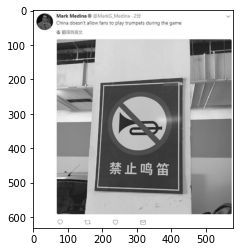

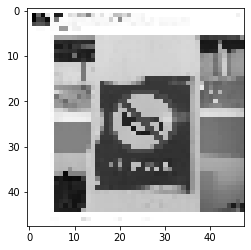

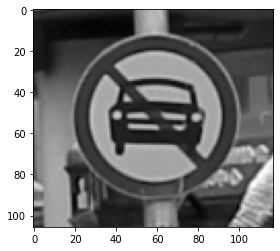

In [23]:
im = cv2.imread("../Extra_data/NO_noise2.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(im, cmap='gray')
im = cv2.resize(im, (48, 48))
plt.figure()
plt.imshow(im, cmap='gray')

fea = ft.hog(im, orientations=8, pixels_per_cell=(10, 10), cells_per_block=(1, 1), visualize=False, multichannel=False)
ans = clf.predict([fea])
print(ans[0])
print(np.max(clf.predict_proba([fea])))
im = cv2.imread(dataset_path + '/' + str(ans[0]) + '_0001.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(im, cmap='gray')

### Sliding window 48*48 with HOG

[0.8571558145302611, '055', 436, 216]
[0.8579724790658355, '055', 3, 286]
[0.8630784227798023, '055', 436, 213]
[0.8724194672139158, '055', 436, 214]
[0.8726640087299771, '054', 534, 74]


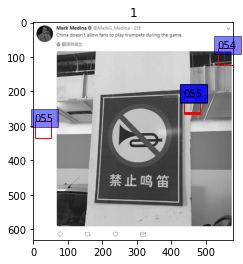

[0.790366174088913, '054', 83, 89]
[0.7938329383983659, '054', 84, 92]
[0.8058808619446064, '054', 83, 92]
[0.8307286788085763, '054', 82, 92]
[0.8461502179155191, '054', 85, 92]


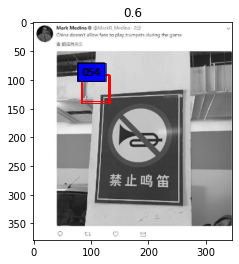

[0.8403958427234998, '054', 427, 319]
[0.8454256610500338, '054', 172, 295]
[0.8459030465500365, '054', 427, 318]
[0.8801729620081784, '054', 170, 295]
[0.8992156513947652, '054', 171, 295]


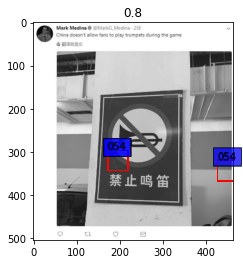

In [26]:
img = cv2.imread("../Extra_data/NO_noise2.jpg", cv2.IMREAD_GRAYSCALE)
window = 48
conf_threhold = 0.6
max_num = 5
zoom = [1, 0.6, 0.8]
a = 1
for z in zoom:
    im = cv2.resize(img, dsize=None, fx=z, fy=z)
    ans = []
    for i in range(im.shape[0] - window):
        for j in range(im.shape[1] - window):
            patch = im[i:i + window, j:j + window]
            fea = ft.hog(patch, orientations=8, pixels_per_cell=(10, 10), cells_per_block=(1, 1), visualize=False,
                     multichannel=False)
            max = np.max(clf.predict_proba([fea]))
            if max > conf_threhold:
                ans.append([max, clf.predict([fea])[0], i, j])
    index = np.array(ans)[:, 0]
    wt = np.argsort(index)[-max_num:len(index)]
    plt.figure(a)
    a+=1
    plt.imshow(im, cmap='gray')
    plt.title(str(z))
    for i in wt:
        box = ans[i]
        print(box)
        ax = plt.gca()
        ax.add_patch(plt.Rectangle((box[2], box[3]), window, window, color="red", fill=False, linewidth=1))
        ax.text(box[2], box[3], str(box[1]), bbox={'facecolor':'blue', 'alpha':0.5})
    plt.show()

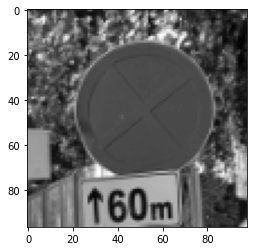

In [27]:
im = cv2.imread(dataset_path + '/' + '054' + '_0001.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(im, cmap='gray')
